# map demo 3

In this example we will 
- Use some crazy projections
- Do some themeing for our maps


Inspired by https://xkcd.com/977/ 

In [139]:
library("rnaturalearth")
library("ggplot2")
library(sf)
library(lwgeom)  
library(cowplot) 

# You also need to install rnaturalearthhires for this to work. 
# devtools::install_github("ropensci/rnaturalearthhires")
# devtools::install_github("ropensci/rnaturalearthdata")

# Get some data to put on the map 

label_frame <- data.frame("Label" = c("Brisbane", "Perth"), "Lat" = c(-27.4705, -31.9523), "Lon" = c(153.0260, 115.8613))
label_frame <- st_as_sf(x=label_frame, coords = c("Lon", "Lat"), crs = "EPSG:4326")


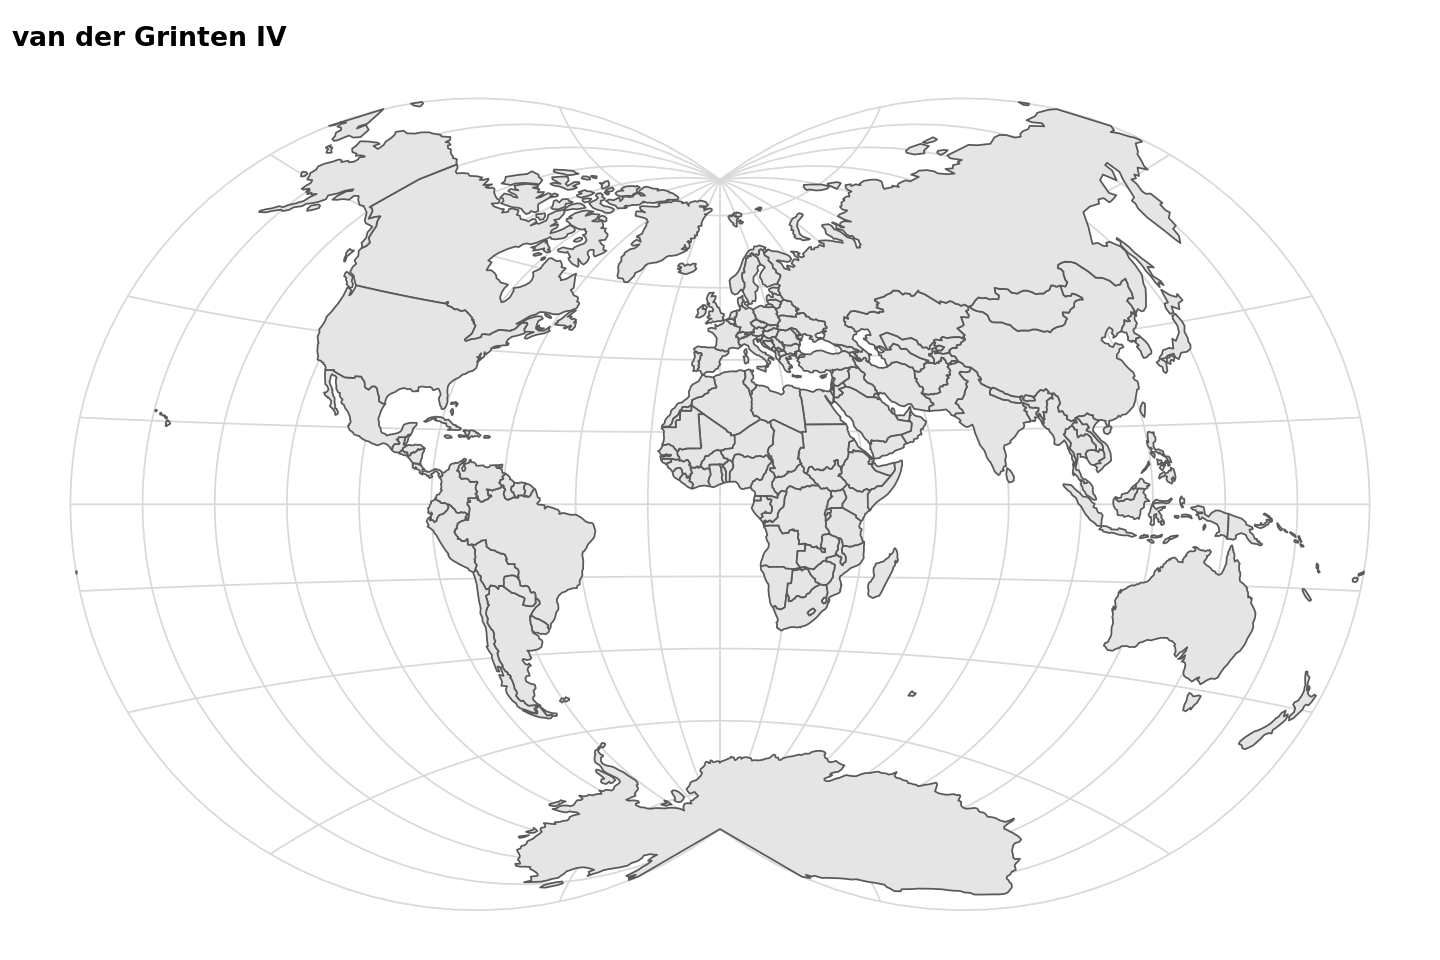

In [140]:
options(repr.plot.width=12, repr.plot.height=8)

world_sf <- ne_countries(returnclass = "sf")

# Themed with minimal grid from cowplot 

world <- ggplot() +
    geom_sf(data = world_sf )  +
    ggtitle("van der Grinten IV")+ 
  theme_minimal_grid()+ 
    coord_sf(crs= "+proj=vandg4")
world 

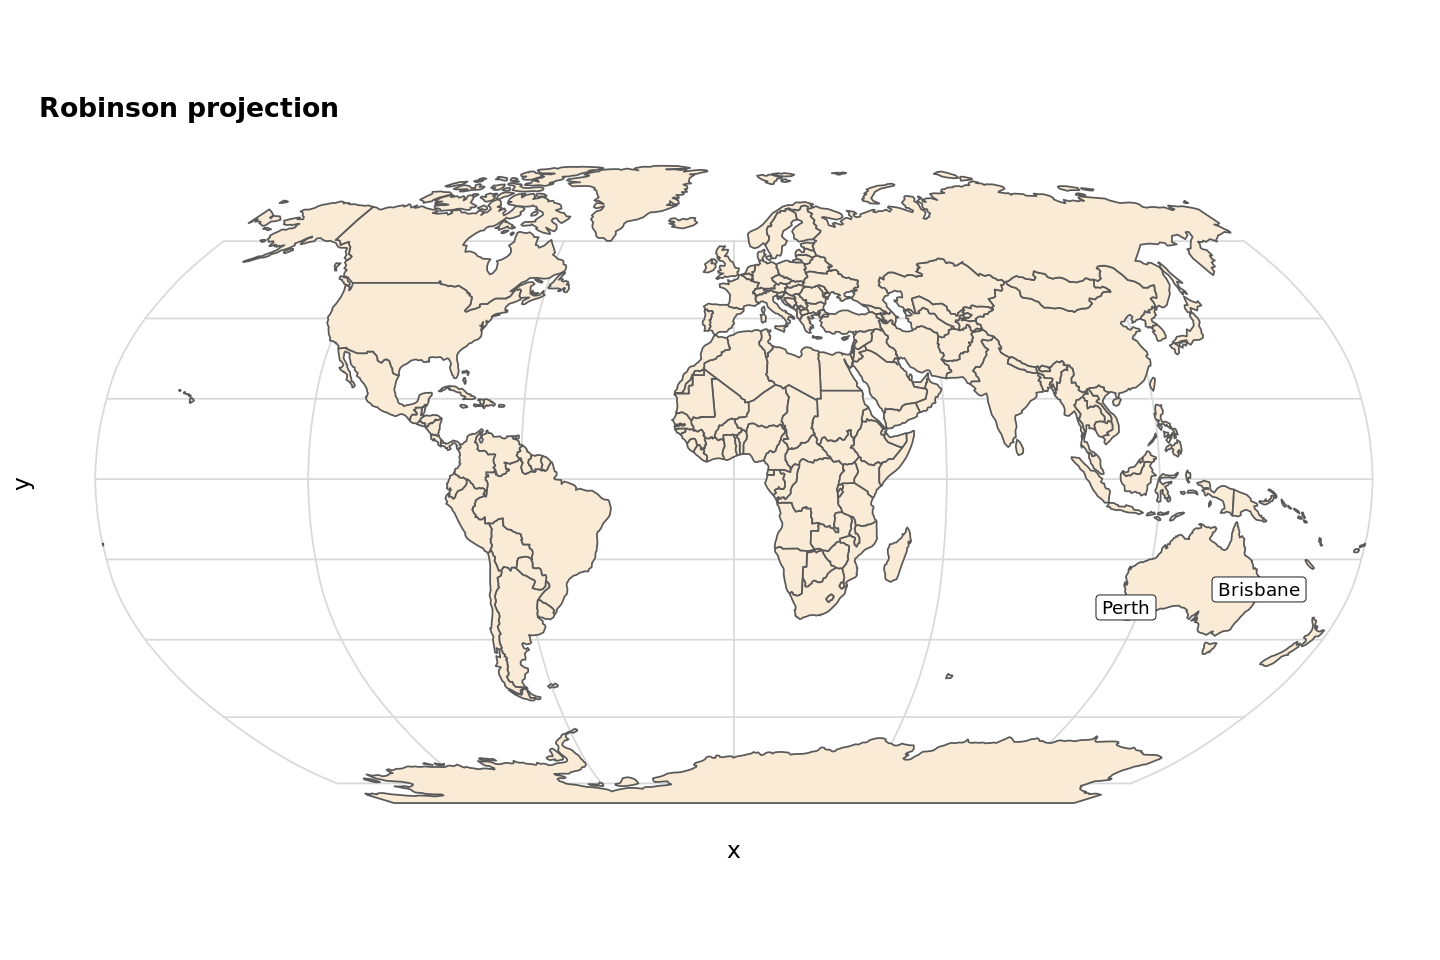

In [141]:
world_sf <- ne_countries(returnclass = "sf")

world <- ggplot() +
    geom_sf(data = world_sf, fill= "antiquewhite")  + 
    geom_sf_label(data = label_frame, aes(label = Label)) +
    coord_sf(crs= "+proj=robin") +
    theme_minimal_grid() + 
    ggtitle("Robinson projection")
world 

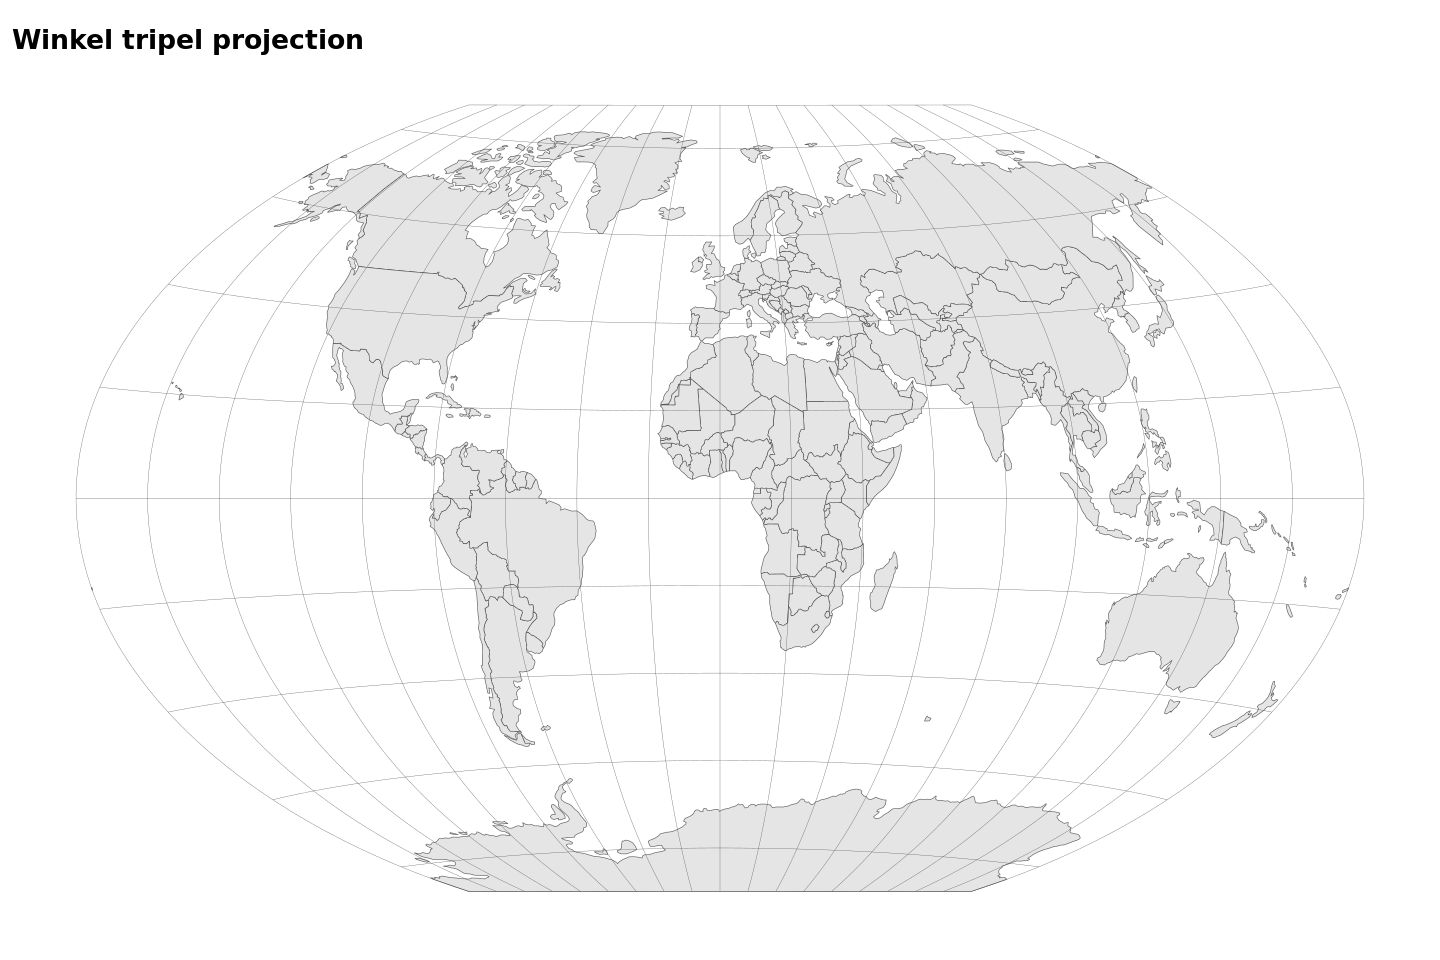

In [142]:
#From: https://wilkelab.org/practicalgg/articles/Winkel_tripel.html

crs_wintri <- "+proj=wintri +datum=WGS84 +no_defs +over"
world_wintri <- st_transform_proj(world_sf, crs = crs_wintri)

grat_wintri <- 
  st_graticule(lat = c(-89.9, seq(-80, 80, 20), 89.9)) %>%
  st_transform_proj(crs = crs_wintri)


ggplot(world_wintri) + 
  geom_sf(size = 0.5/.pt) +
  geom_sf(data = grat_wintri, color = "gray30", size = 0.25/.pt) + 
  coord_sf(datum = NULL) +
  theme_map() + 
    ggtitle("Winkel tripel projection")

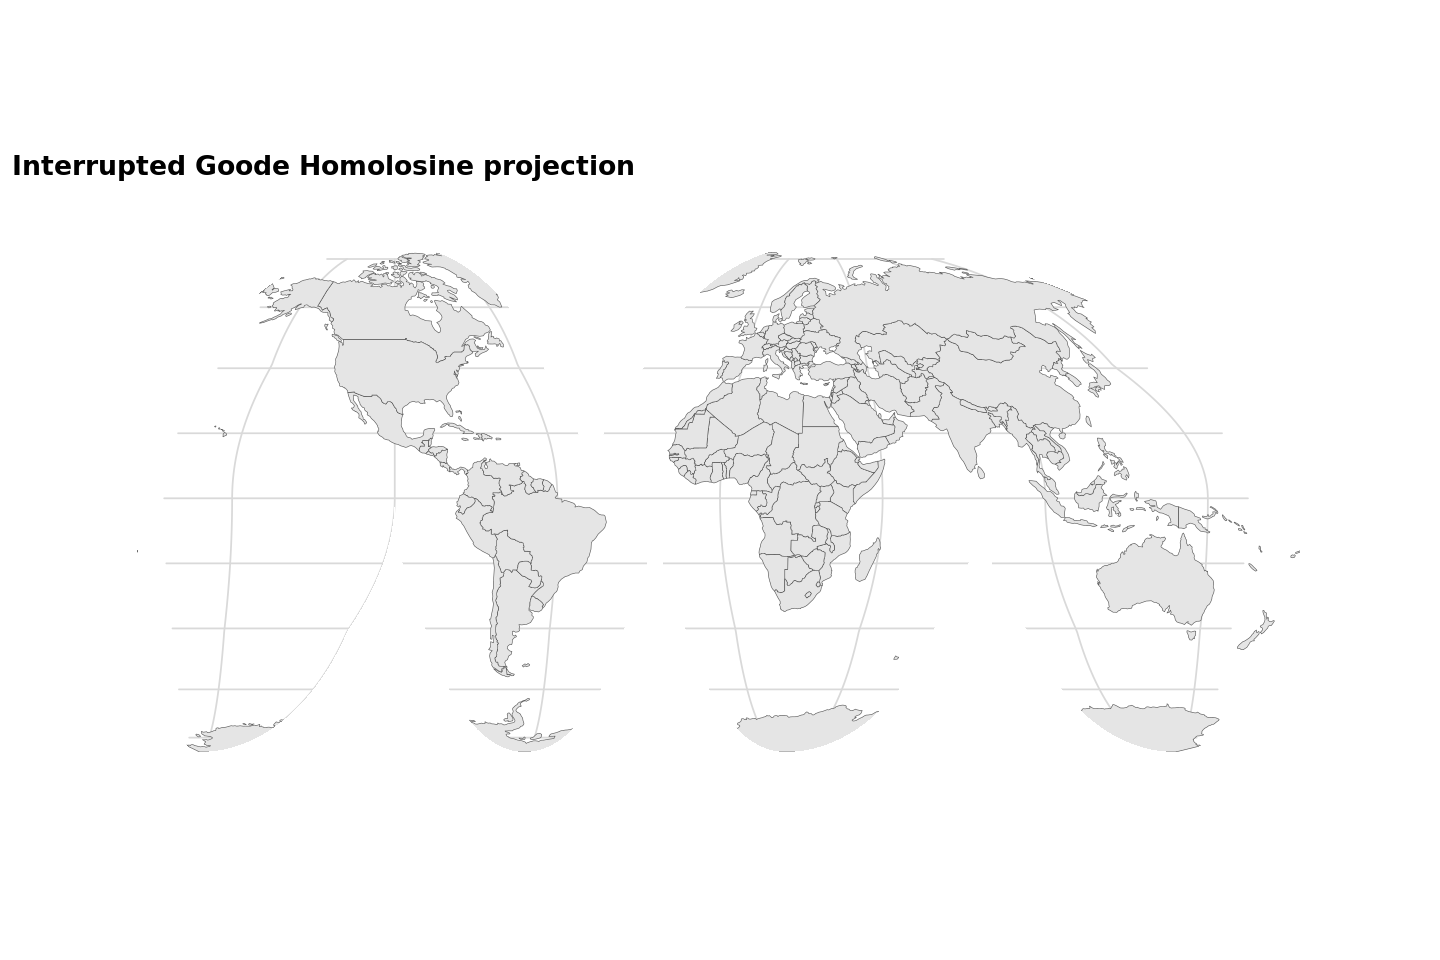

In [143]:
# From https://wilkelab.org/practicalgg/articles/goode.html

options(repr.plot.width=12, repr.plot.height=8)

world_sf <- ne_countries(returnclass = "sf")
crs_goode = "+proj=igh" 

# projection outline in long-lat coordinates
lats <- c(
  90:-90, # right side down
  -90:0, 0:-90, # third cut bottom
  -90:0, 0:-90, # second cut bottom
  -90:0, 0:-90, # first cut bottom
  -90:90, # left side up
  90:0, 0:90, # cut top
  90 # close
)
longs <- c(
  rep(180, 181), # right side down
  rep(c(80.01, 79.99), each = 91), # third cut bottom
  rep(c(-19.99, -20.01), each = 91), # second cut bottom
  rep(c(-99.99, -100.01), each = 91), # first cut bottom
  rep(-180, 181), # left side up
  rep(c(-40.01, -39.99), each = 91), # cut top
  180 # close
)

goode_outline <- 
  list(cbind(longs, lats)) %>%
  st_polygon() %>%
  st_sfc(
    crs = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
  )

goode_outline <- st_transform(goode_outline, crs = crs_goode)

# get the bounding box in transformed coordinates and expand by 10%
xlim <- st_bbox(goode_outline)[c("xmin", "xmax")]*1.1
ylim <- st_bbox(goode_outline)[c("ymin", "ymax")]*1.1

# turn into enclosing rectangle
goode_encl_rect <- 
  list(
    cbind(
      c(xlim[1], xlim[2], xlim[2], xlim[1], xlim[1]), 
      c(ylim[1], ylim[1], ylim[2], ylim[2], ylim[1])
    )
  ) %>%
  st_polygon() %>%
  st_sfc(crs = crs_goode)

# calculate the area outside the earth outline as the difference
# between the enclosing rectangle and the earth outline
goode_without <- st_difference(goode_encl_rect, goode_outline)

world <- ggplot(data = world_sf) +
  geom_sf(size = 0.5/.pt) +
  geom_sf(data = goode_without, fill = "white", color = "NA") +
  coord_sf(crs = crs_goode) +
  theme_minimal_grid()+ 
    ggtitle("Interrupted Goode Homolosine projection")
world 


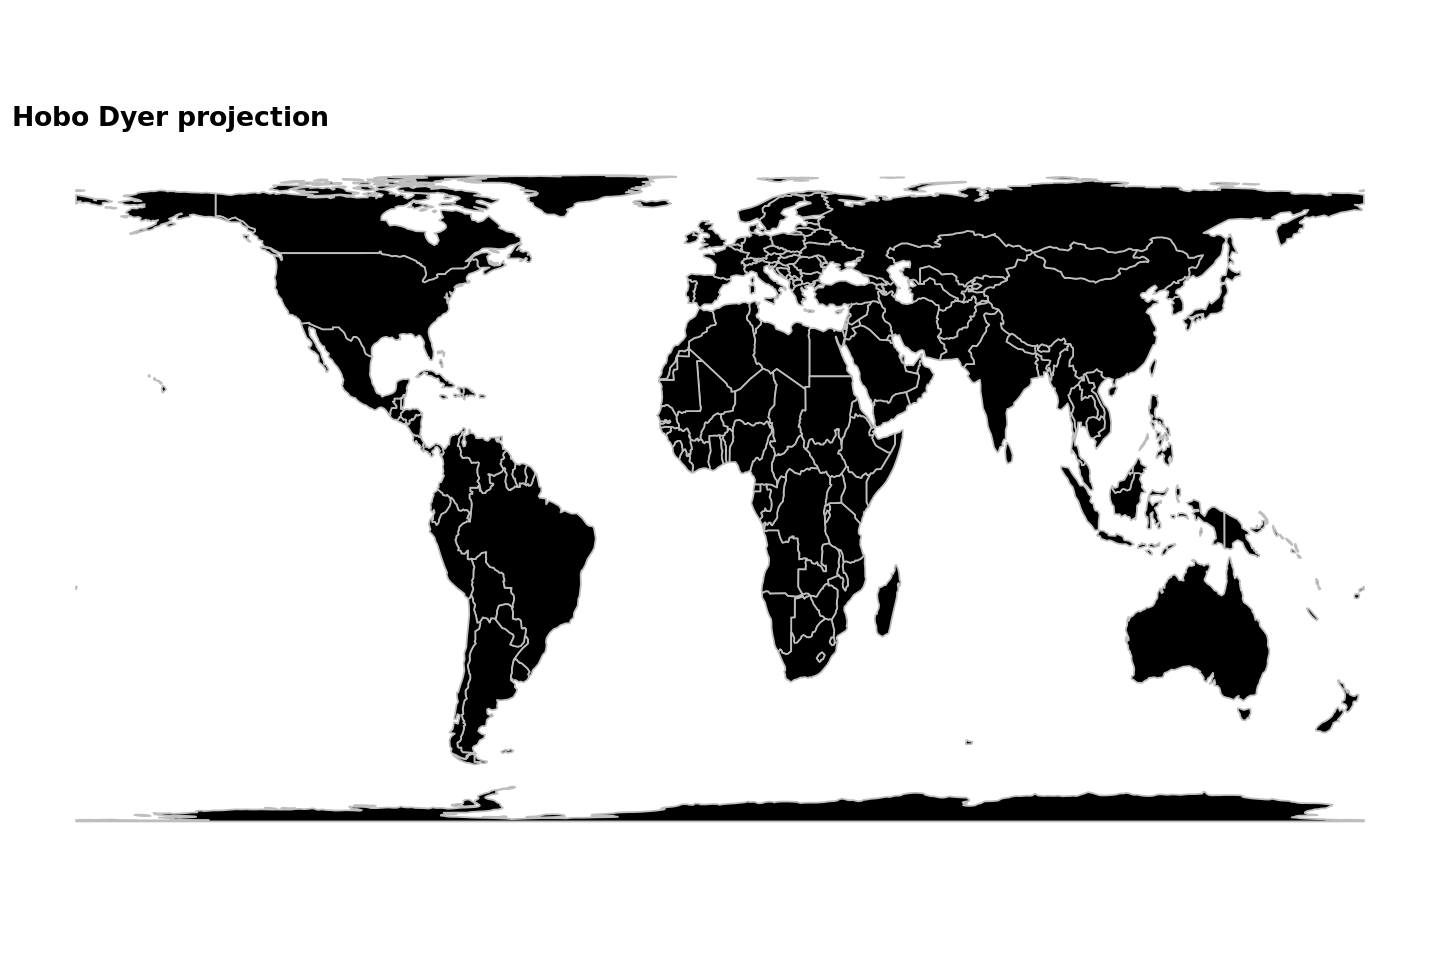

In [144]:
options(repr.plot.width=12, repr.plot.height=8)

world_sf <- ne_countries(returnclass = "sf")

world <- ggplot() +
    geom_sf(data = world_sf, color = "grey", fill = "black")  +
    ggtitle("Hobo Dyer projection")+ 
  theme_map()+ 
    coord_sf(crs= "+proj=cea +lon_0=0 +lat_ts=37.5 +x_0=0 +y_0=0 +ellps=WGS84 +units=m +no_defs")
world 


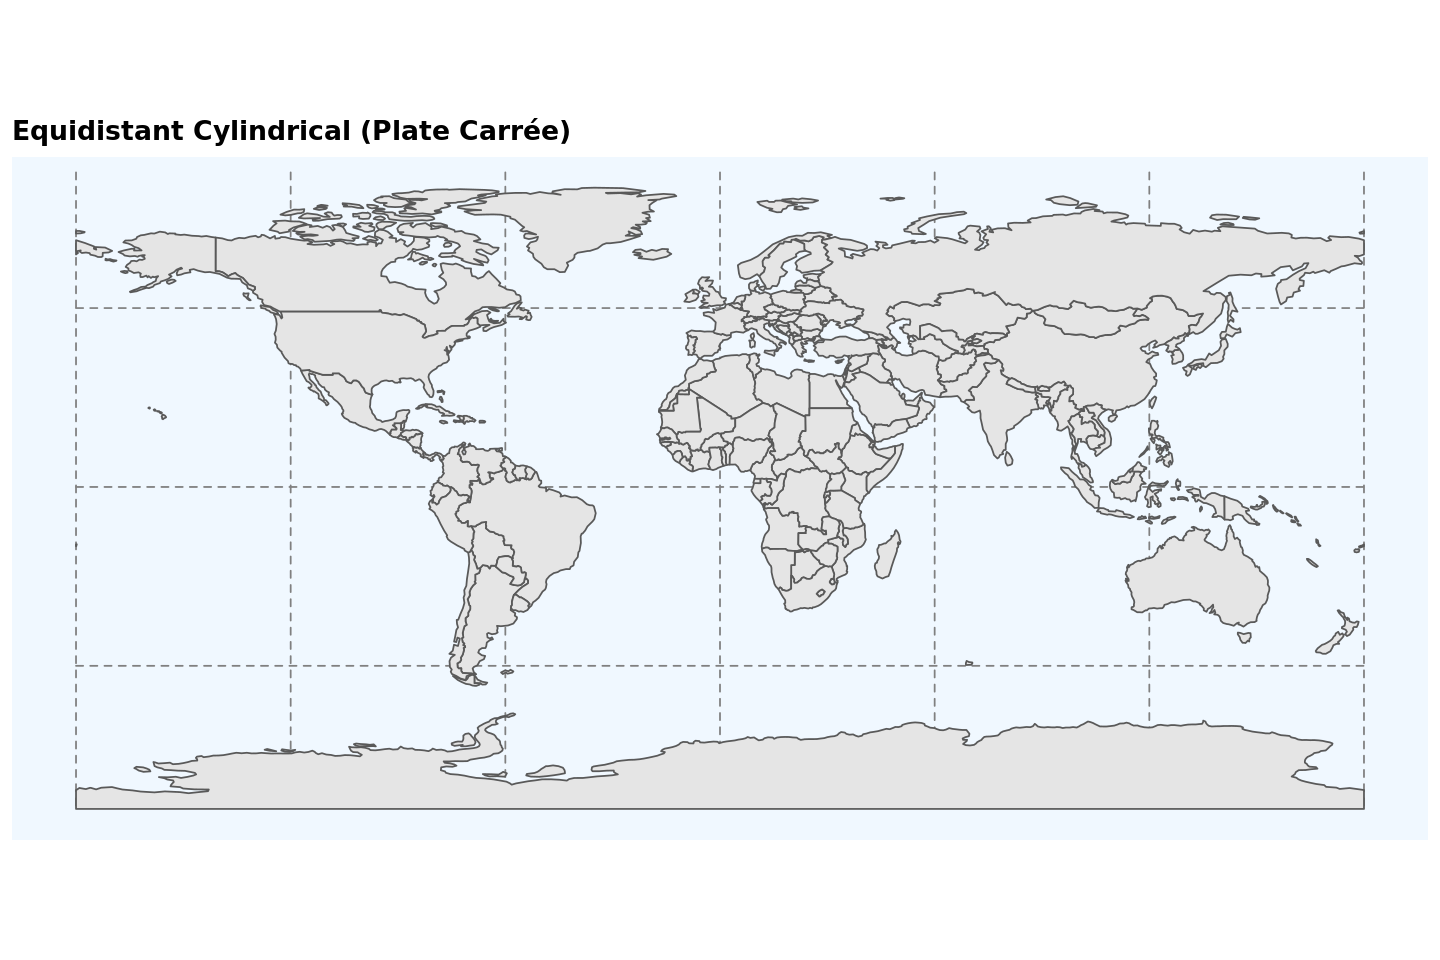

In [145]:
options(repr.plot.width=12, repr.plot.height=8)

world_sf <- ne_countries(returnclass = "sf")

world <- ggplot() +
    geom_sf(data = world_sf)  + 
    ggtitle("Equidistant Cylindrical (Plate Carrée)") +
  theme_minimal_grid()+ 
    coord_sf(crs= "+proj=eqc") + 
    theme(panel.grid.major = element_line(color = gray(.5), linetype = "dashed", size = 0.5), 
          panel.background = element_rect(fill = "aliceblue"))
world 

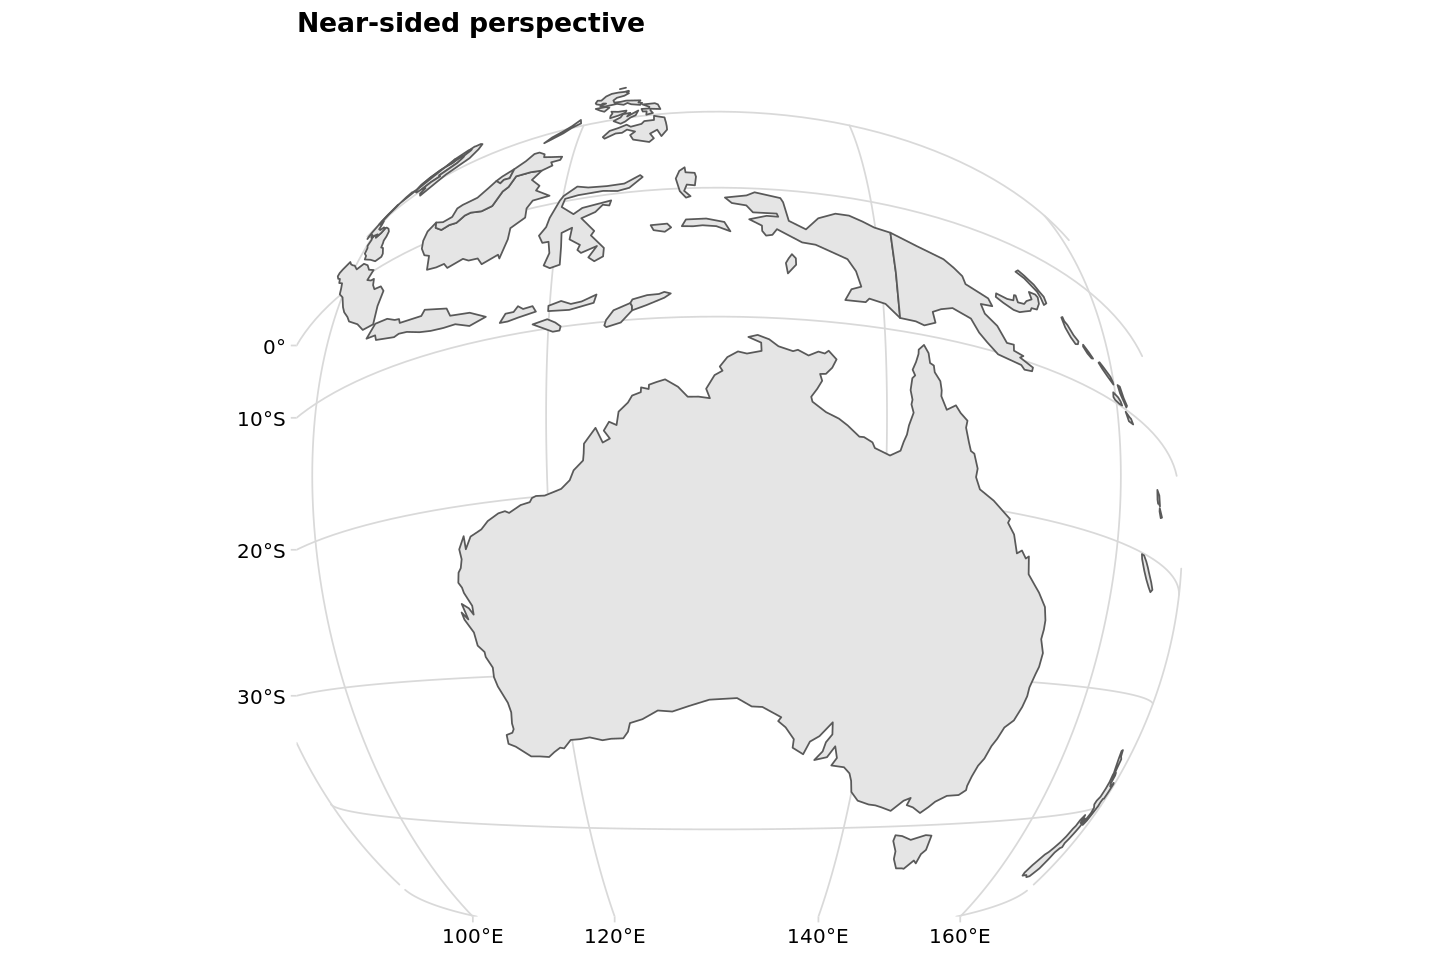

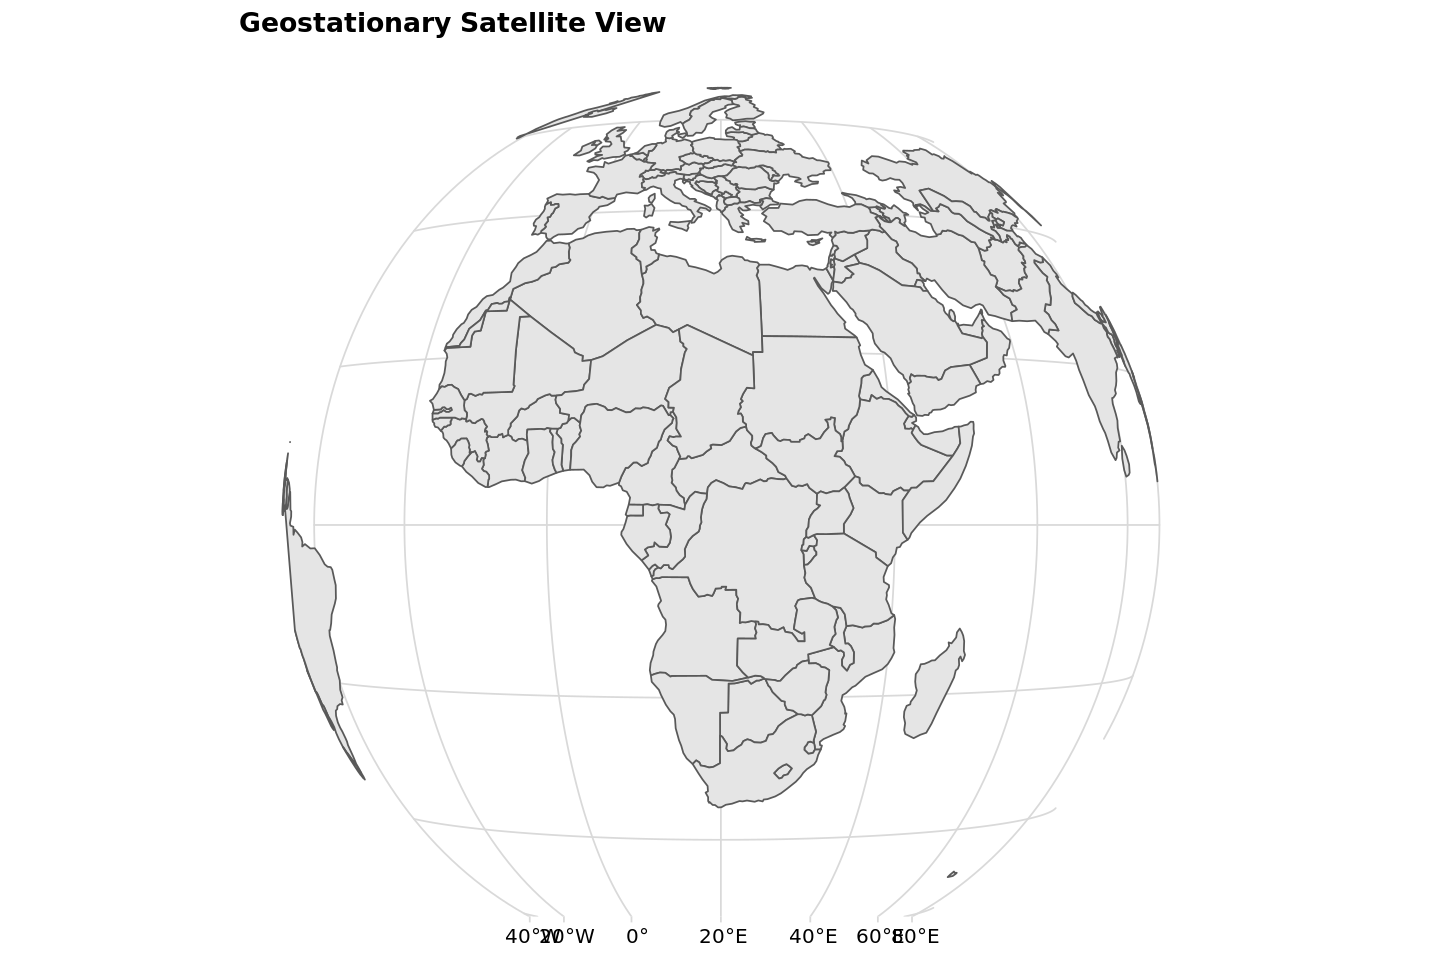

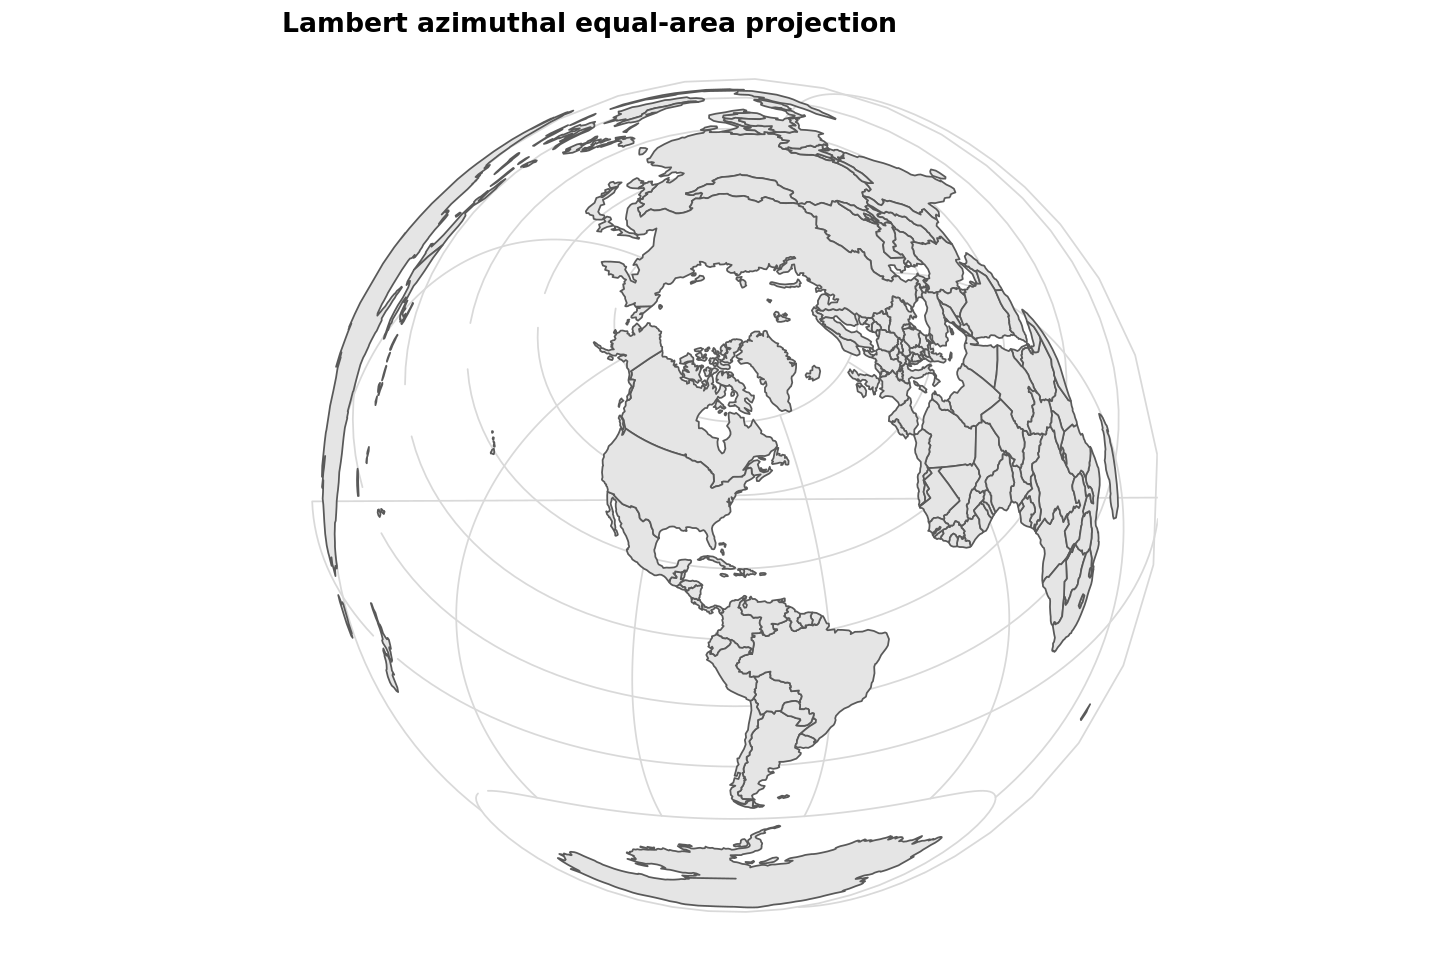

In [146]:
# A lot of options for a globe Orthographic works fine. but the proportions look a bit flat. 
# Geostationary Satellite View :  +proj=geos +h=35785831.0 +lon_0=-70 +sweep=y 
# There's also Near-sided perspective: +proj=nsper +h=3000000 +lat_0=-23 +lon_0=130
# Lambert azimuthal equal-area projection is another option 

options(repr.plot.width=12, repr.plot.height=8)

world_sf <- ne_countries(returnclass = "sf")

world <- ggplot() +
    geom_sf(data = world_sf)  + 
    ggtitle("Near-sided perspective") +
  theme_minimal_grid()+ 
    coord_sf(crs= "+proj=nsper +h=3000000 +lat_0=-23 +lon_0=130")

world 


world <- ggplot() +
    geom_sf(data = world_sf)  + 
    ggtitle("Geostationary Satellite View") +
  theme_minimal_grid()+ 
    coord_sf(crs= "+proj=geos +h=35785831.0 +lon_0=20 +sweep=y ")

world 

world <- ggplot() +
    geom_sf(data = world_sf)  + 
    ggtitle("Lambert azimuthal equal-area projection") +
  theme_minimal_grid()+ 
    coord_sf(crs= "+proj=laea +x_0=0 +y_0=0 +lon_0=-74 +lat_0=40") 
world 


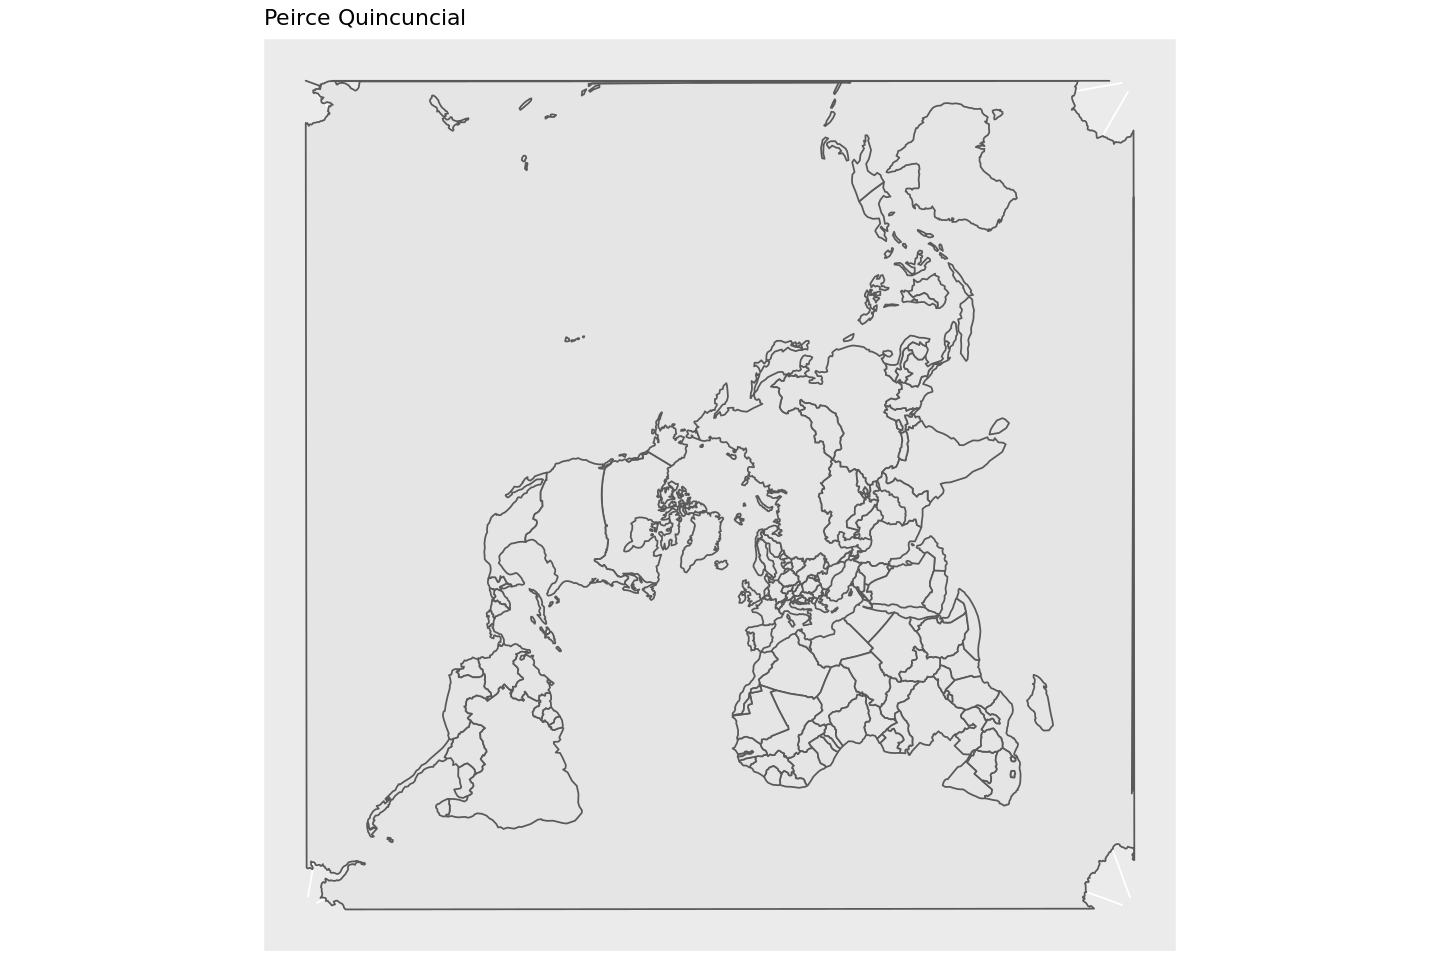

In [147]:
# Doesn't really work, I don't think it is supported. 
# Someone implemented something for R here: https://github.com/cspersonal/peirce-quincuncial-projection 
world <- ggplot() +
    geom_sf(data = world_sf)  + 
    ggtitle("Peirce Quincuncial") +
    coord_sf(crs= "+proj=peirce_q +lon_0=25 +shape=square")
    
world 

# Waterman butterfly is also not implemented either. 


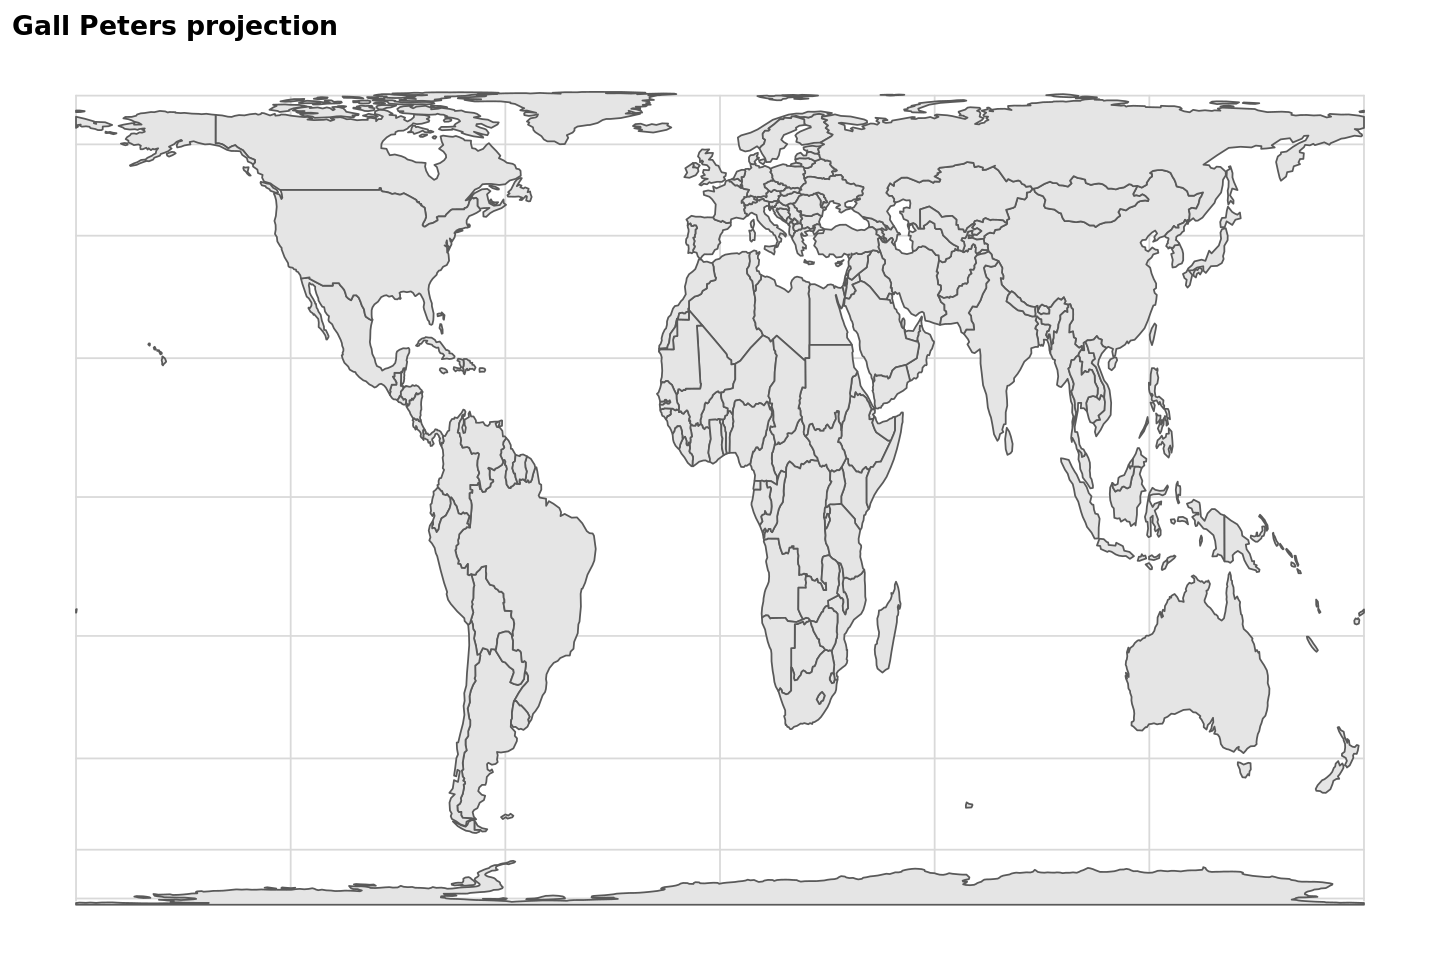

In [148]:
# A lot of these projections like Gall Peters and Hobo Dyer are Equal Area Cylindrical projections with specific settings. 

world <- ggplot() +
    geom_sf(data = world_sf)  + 
    ggtitle("Gall Peters projection") +
  theme_minimal_grid()+ 
    coord_sf(crs= "+proj=cea +lon_0=0 +x_0=0 +y_0=0 +lat_ts=45 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
    
world 
